## Trying a Markov Model with Framingham Data

Building a first multi-state model using the reshaped Framingham data.

The framingham_ms Dataset I created contains 6,793 state observations, defined as:

- state 1: No Disease
- state 2: Hypertension
- state 3: Cardiovascular disease
- state 4: Death

The Framingham data was reshaped using Python 3 in a notebook entitled FraminghamReshaping.ipynb.

In [1]:
library("msm")

Warning message:
“package ‘msm’ was built under R version 3.6.3”

In [2]:
frmghm_ms <- read.csv("Datasets/framingham_ms.csv", header = TRUE, sep = ",") 
frmghm_ms

X,RANDID,AGE,SEX,BMI,CURSMOKE,DIABETES,STATE,DAYS,YEARS
0,2448,39,1,26.97,0,0,1,0,0.000000
1,2448,52,1,.,0,0,3,6438,17.638356
2,6238,46,2,28.73,0,0,1,0,0.000000
3,9428,48,1,25.34,1,0,1,0,0.000000
4,10552,61,2,28.58,1,0,2,0,0.000000
5,10552,67,2,30.18,1,0,3,2089,5.723288
6,10552,67,2,30.18,1,0,4,2956,8.098630
7,11252,46,2,23.1,1,0,1,0,0.000000
8,11252,51,2,23.48,1,0,2,4285,11.739726
9,11263,43,2,30.3,0,0,2,0,0.000000


## Define states and transitions allowed for model

Provide initial values representing a guess that the mean period in each state before moving to the next is about two years (qrr = -0.5) and there is an equal probability of progression, recovery or death (qrr = - SUM where s ne r of qrs).  

An alternative to this is to supply the option "gen.inits=TRUE" in the msm function call.  This sets the initial values for non-zero entries of the Q matrix (transition intensity matrix) to the maximum likelihood estimates under the assumption that transitions take place only at observation times.

In [3]:
twoway4.q <- rbind(c(0, 0.166, 0.166, 0.166), c(0, 0, 0.25, 0.25), c(0, 0.25, 0, 0.25), c(0,0,0,0))
statetable.msm(STATE, RANDID, data=frmghm_ms)
Q = crudeinits.msm(STATE ~ YEARS, RANDID, data=frmghm_ms, qmatrix=twoway4.q)
Q

    to
from   1   2   3   4
   1   0 890 251 313
   2   0   0 399 366
   3   0  46   0 313

Warning message in msm.check.times(time, subject, state):
“Subjects 6238, 9428, 12629 and others only have one complete observation, which doesn't give any information”

-0.06833903,0.04183063,0.01179718,0.01471122
0.00000000,-0.07924658,0.04133253,0.03791405
0.00000000,0.03042488,-0.23744634,0.20702146
0.00000000,0.00000000,0.00000000,0.00000000


In [4]:
# Each initial transition block must add up to -qrr (0.5) based on the assumption
# In state 1 there are 3 possible transitions - to hypertension (2), to cvd (3), or death (4)
# In state 2 there are 2 possible transitions - to cvd (3), or death (4)
# In state 3 there are 2 possible transition - to hypertension (2), or death (4)
# In state 4 there are no further transitions possible (obviously)


rownames(twoway4.q) <- colnames(twoway4.q) <- c("Well", "Hypertensive", "CVD", "Death")

In [5]:
frm.msm <- msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, qmatrix = Q, death = 4, exacttimes=TRUE)

Warning message in msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, qmatrix = Q, :
“Ignoring death argument, as all states have exact entry times”Warning message in msm.check.times(mf$"(time)", mf$"(subject)", mf$"(state)"):
“Subjects 6238, 9428, 12629 and others only have one complete observation, which doesn't give any information”

In [6]:
frm.msm


Call:
msm(formula = STATE ~ YEARS, subject = RANDID, data = frmghm_ms,     qmatrix = Q, death = 4, exacttimes = TRUE)

Maximum likelihood estimates

Transition intensities
                  Baseline                    
State 1 - State 1 -0.06834 (-0.07194,-0.06492)
State 1 - State 2  0.04183 ( 0.03917, 0.04467)
State 1 - State 3  0.01180 ( 0.01042, 0.01335)
State 1 - State 4  0.01471 ( 0.01317, 0.01643)
State 2 - State 2 -0.07925 (-0.08507,-0.07383)
State 2 - State 3  0.04133 ( 0.03747, 0.04559)
State 2 - State 4  0.03791 ( 0.03422, 0.04200)
State 3 - State 2  0.03042 ( 0.02279, 0.04062)
State 3 - State 3 -0.23745 (-0.26332,-0.21411)
State 3 - State 4  0.20702 ( 0.18531, 0.23127)

-2 * log-likelihood:  21921.11 
[Note, to obtain old print format, use "printold.msm"]

## Interpreting the Transition Intensities

- Mean time in the Well state: 1/0.06834 = 14.63 years
- Mean time in the Hypertensive state: 1/0.07925 = 12.62 years
- Mean time in the CVD state: 1/0.23745 = 4.21 years


- From the Well state, the likelihood of transition to Hypertensive is: 0.04183 (4.2%)
- From the Well state, the likelihood of transition to CVD is: 0.01180 (1.2%)
- From the Well state, the likelihood of transition to Death is 0.01471 (1.5%)


- From the Hypertensive state, the likelihood of transition to CVD is: 0.04133 (4.1%)
- From the Hypertensive state, the likelihood of transition to Death is: 0.03791 (3.8%)


- From the CVD state, the likelihood of transition to Hypertensive is: 0.03042 (3.0%)
- From the CVD state, the likelihood of transition to Death is: 0.20702 **(20.7%)**


- The odds of transition to Hypertension, given CVD: 0.03042 / 0.20702 = 0.1469
- The odds of transition to Death, given CVD:  0.20702 / 0.03042 = 6.81
- The odds ratio: 6.81 / 0.1469 = One is 46.36 times more likely to become Dead than Hypertensive, given CVD.


- The odds of Death once you have CVD (in the 1960s) were 6.81 to 1.


In [7]:
# Display the Transition Probability Matrix, P(t) over an interval of t=1 (in this case, 1 year)
# ci = "normal" computes a confidence interval for P(t) by repeated sampling from the asymptotic 
# normal distribution of the maximum likelihood estimates of the log(qrs)
# Based on a default 1000 samples, converged to within 2 significant figures
# ci = "boot" will instead compute intervals using nonparametric bootstrap resampling, drawn with replacement
# the model is refitted repeatedly to estimate the sampling uncertainty surrounding the estimates 
# more accurate, but slower
pmatrix.msm(frm.msm, t = 1, ci = "normal")

        State 1                    State 2                   
State 1 0.93394 (0.930440,0.93715) 0.03902 (0.036831,0.04168)
State 2 0                          0.92436 (0.919260,0.92926)
State 3 0                          0.02600 (0.019720,0.03468)
State 4 0                          0                         
        State 3                    State 4                   
State 1 0.01090 (0.009743,0.01220) 0.01614 (0.014722,0.01774)
State 2 0.03532 (0.031912,0.03870) 0.04031 (0.036626,0.04387)
State 3 0.78916 (0.769508,0.80714) 0.18484 (0.166459,0.20270)
State 4 0                          1.00000 (1.000000,1.00000)

## Transition Probabilities

- The probability of being Well 1 year from now, given Well is 93.4%
- The probability of being Hypertensive 1 year from now, given Well is 4%
- The probability of being CVD 1 year from now, given Well is 1%
- The probability of being Dead 1 year from now, given Well is 1.6%


- The probability of being Hypertensive 1 year from now, given Hypertensive is 92%
- The probability of being CVD 1 year from now, given Hypertensive is 3.5%
- The probability of being Dead 1 year from now, given Hypertensive is 4%


- The probability of being CVD 1 year from now, given CVD is 79%
- The probability of being Hypertensive 1 year from now, given CVD is 2.6%
- The probability of being Dead 1 year from now, given CVD is 18.5%

In [9]:
# A model with covariates: sex, age and diabetes (yes or no)

frm.cov.msm <- msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, covariates = ~ AGE + SEX + DIABETES, 
                   qmatrix = Q, death = 4, method = "BFGS", exacttimes = TRUE,
                   control = list(fnscale=20000, maxit=10000))

Warning message in msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, covariates = ~AGE + :
“Ignoring death argument, as all states have exact entry times”Warning message in msm.check.times(mf$"(time)", mf$"(subject)", mf$"(state)"):
“Subjects 6238, 9428, 12629 and others only have one complete observation, which doesn't give any information”

In [10]:
# Display hazard ratios for each covariate on each transition with 95% confidence intervals
hazard.msm(frm.cov.msm)

,HR,L,U
State 1 - State 2,0.9808779,0.9728511,0.9889709
State 1 - State 3,1.0223168,1.0075944,1.0372544
State 1 - State 4,1.0495283,1.0360672,1.0631642
State 2 - State 3,0.9966478,0.9845977,1.0088455
State 2 - State 4,1.0243488,1.0111303,1.0377401
State 3 - State 2,0.9026496,0.8670180,0.9397455
State 3 - State 4,1.0138929,0.9983484,1.0296795
,HR,L,U
State 1 - State 2,1.2182056,1.0641594,1.3945514
State 1 - State 3,0.5322839,0.4124096,0.6870019


## Interpreting the (significant) Hazard Ratios

- An initial diagnosis of Diabetes increases the risk of CVD onset (Well -> CVD) by 87%
- An initial diagnosis of Diabetes increases the risk of CVD for those already Hypertensive by 53%.


- 1 year increase in donor age is associated with a 2% increased risk of CVD onset (Well -> CVD)
- 1 year increase in donor age is associated with a 4.5% increased risk of Death (Well -> Death)
- 1 year increase in donor age is associated with a 2.4% increased risk of Death (Hypertensive -> Death)


- Being Female increases the risk of Hypertension (Well -> HTN) by 22%
- Being Female increases the chance of going from CVD to Hypertension by 135%

In [15]:
# Calculating the Transition Intensity Matrix for specified covariates
# Age: 40, Primary Diagnosis: Diabetes
# Note: Avg age is 50

qmatrix.msm(frm.cov.msm, covariates = list(AGE = 40, DIABETES = 1))


        State 1                       State 2                      
State 1 -0.08437 (-0.131665,-0.05406)  0.03048 ( 0.016876, 0.05507)
State 2 0                             -0.09850 (-0.149417,-0.06494)
State 3 0                              0.04876 ( 0.013857, 0.17158)
State 4 0                             0                            
        State 3                       State 4                      
State 1  0.04432 ( 0.021555, 0.09115)  0.00956 ( 0.004142, 0.02206)
State 2  0.07978 ( 0.048844, 0.13032)  0.01872 ( 0.009692, 0.03616)
State 3 -0.20639 (-0.333090,-0.12788)  0.15763 ( 0.096445, 0.25762)
State 4 0                             0                            

## Comparing this patient to the average patient

- Average patient's likelihood of transition from Well -> HTN 0.04183 (4.2%), for this patient it is 3%
- Average patient's likelihood of transition from Well -> CVD 0.01180 (1.2%), for this patient it is 4.4%
- Average patient's likelihood of transition from HTN -> CVD 0.04133 (4.1%), for this patient it is 8%
- Average patient's likelihood of transition from CVD -> Death 0.20702 (20.7%), for this patient it is 15.8%


- Average patient's mean time in Well state 14.63 yrs, this patient 11.85 yrs
- Average patient's mean time in Hypertensive state 12.62 yrs, this patient 10.15 yrs
- Average patient's mean time in CVD state 4.21 yrs, this patient 4.85 yrs

In [17]:
# Does the model with covariates fit significantly better than the one without? 
# Compare the likelihood ratio statistic to Chi-square distribution with 21 degrees of freedom

lrtest.msm(frm.msm, frm.cov.msm)

,-2 log LR,df,p
frm.cov.msm,190.7135,21,0


The p-value is highly significant.

## When Q is piecewise-constant

Transition probabilities can be calculated in closed form by summing the likelihood over the unknown observed state at the times when the covariates change.

In [20]:
# Fitting a model where all intensities change 12 years after the beginning of the study
# Divides data into 2 time periods: -Inf to 12 yrs, and 12 yrs to Inf
# The study lasted a little more than 24 years, so this is about the halfway point

frm.pci.msm <- msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, qmatrix = Q, 
                   death = 4, pci = 12, method = "BFGS", exacttimes = TRUE,
                   control = list(fnscale=20000, maxit=10000))

# Is this data truly time-inhomogenous?
lrtest.msm(frm.msm, frm.pci.msm)

Warning message in msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, qmatrix = Q, :
“Ignoring death argument, as all states have exact entry times”Warning message in msm.check.times(mf$"(time)", mf$"(subject)", mf$"(state)"):
“Subjects 6238, 9428, 12629 and others only have one complete observation, which doesn't give any information”

,-2 log LR,df,p
frm.pci.msm,9244.874,7,0


It is very likely that the data is time-inhomogenous.

In [21]:
hazard.msm(frm.pci.msm)

,HR,L,U
State 1 - State 2,3.7330166,1.17980793,11.8115943
State 1 - State 3,0.6879752,0.01502105,31.5097734
State 1 - State 4,0.6012750,0.01719963,21.0197315
State 2 - State 3,0.1769239,0.12888939,0.2428599
State 2 - State 4,0.4950921,0.35157797,0.6971886
State 3 - State 2,0.1364280,0.07696209,0.2418412
State 3 - State 4,0.7242558,0.57558291,0.9113309


- There is an increased onset rate of Hypertension in the second period (273%!)
- There is a decreased onset rate of CVD given HTN in the second period (82%)
- There is a decreased onset rate of Death given HTN in the second period (50%)
- There is a decreased onset rate of HTN given CVD in the second period (86%)
- There is a decreased onset rate of Death given CVD in the second period (28%)


## Diagnostic Plots

Comparing model predictions with Kaplan-Meier curves

Warning message in msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, qmatrix = Q, :
“Ignoring death argument, as all states have exact entry times”Warning message in msm.check.times(mf$"(time)", mf$"(subject)", mf$"(state)"):
“Subjects 6238, 9428, 12629 and others only have one complete observation, which doesn't give any information”

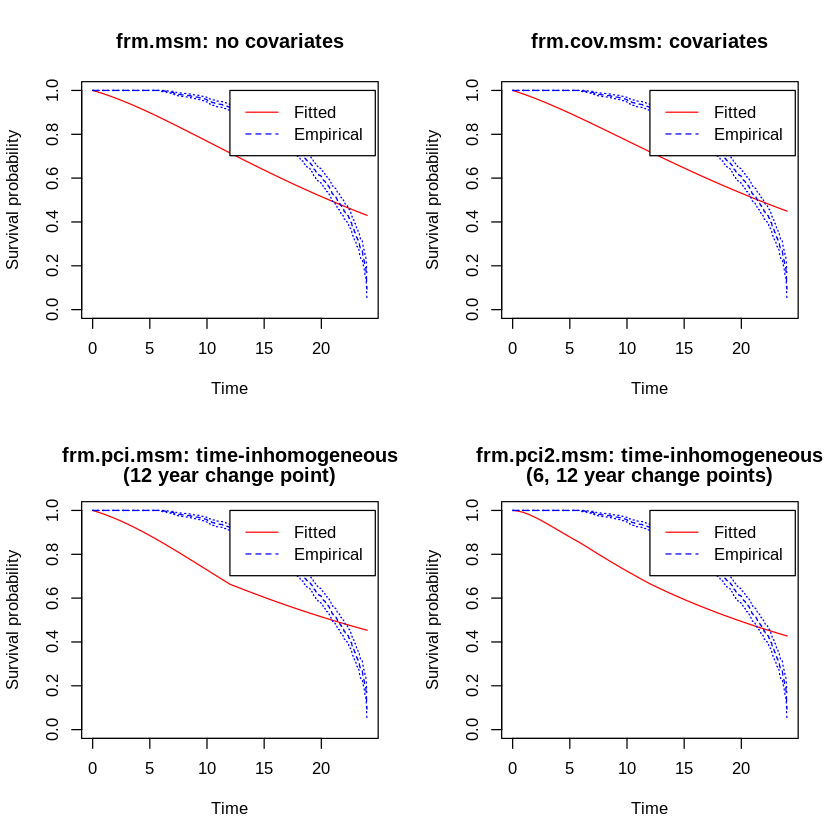

In [22]:
par(mfrow = c(2, 2))
plot.survfit.msm(frm.msm, main = "frm.msm: no covariates", mark.time = FALSE)
plot.survfit.msm(frm.cov.msm, main = "frm.cov.msm: covariates", mark.time = FALSE)
plot.survfit.msm(frm.pci.msm, mark.time = FALSE)
title("frm.pci.msm: time-inhomogeneous", line = 2)
title("(12 year change point)", line = 1)
frm.pci2.msm <- msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, qmatrix = Q, 
                   death = 4, pci = c(6, 12), method = "BFGS", exacttimes = TRUE,
                   control = list(fnscale=20000, maxit=10000))
plot.survfit.msm(frm.pci2.msm, mark.time = FALSE)
title("frm.pci2.msm: time-inhomogeneous", line = 2)
title("(6, 12 year change points)", line = 1)

The Kaplan-Meier curves show that true survival probability is almost certain for the first 7 years, and then begins to decline.  Our model doesn't predict this - maybe because it ignores people who stay healthy for the duration of the study? 

## Might want to consider a way to indicate censoring of individuals and retain that information instead of discarding it.

## Comparing Observed and Expected Prevalence

Works best when individuals are actually observed at the computed times, otherwise assumptions are made such as individuals are only observed at these times, or midpoints are assumed.

The observed prevalence of a state is simply calculated as the number of individuals known to be in that state, divided by the number of individuals whose state is known at that time, which ignores the information from individuals censored at earlier times (root of Kaplan-Meier estimation :))

In [15]:
# Need to look at how this is implemented by Gentleman et al. 1994 using prevalence.msm, and plot.prevalence.msm

## None of these models give an adequate fit

A more complex pattern of time-dependence or allowing transition intensities to depend on covariates would likely yield a better fit.

## It is also possible to calculate the influence of each individual on the MLE

Using scoreresid.msm

## Extensions of msm and limitations

For continuously-observed processes: mstate (deWreede et al. 2010)

For Random Effects models (unexplained heterogeneity in transition intensities between individuals) - calculating likelihood often intractable with a few exceptions: tracking model - random effect acts on all intensities simultaneously (Satten 1999), or a discrete random effects distribution (Cook et al 2004)